In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Filter out warnings
import warnings 
warnings.filterwarnings('ignore')

# To style plots
# plt.style.use('fivethirtyeight')

# Cycle the colors
from itertools import cycle
# color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# For QQPlots
from statsmodels.graphics.gofplots import qqplot

In [2]:
df_voice = pd.read_csv('voice.csv')
df_voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df_voice.shape

(3168, 21)

In [4]:
df_voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
df_voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374



    Preprocessing: Encoding dependent variable and normalizing data.

In [6]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# Will encode the label to integer (0, 1)
encoder = LabelEncoder()
df_voice['label'] = encoder.fit_transform(df_voice['label'])
encoder.classes_

array(['female', 'male'], dtype=object)

In [7]:
df_voice.shape

(3168, 21)

In [8]:
df_voice.head(2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1


In [9]:
len(df_voice.loc[df_voice['label'] == 1])

1584

1    1584
0    1584
Name: label, dtype: int64


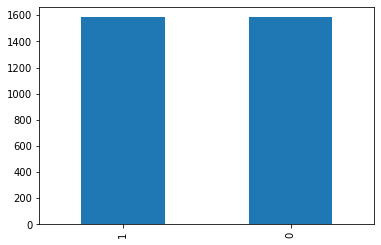

In [10]:
# Getting label count and plotting on bar graph.
print(df_voice.label.value_counts())
p3 = df_voice.label.value_counts().plot(kind='bar')

#### Classes are equally distributed.

In [11]:
df_voice.iloc[1580:1589, 18:21]

,dfrange,modindx,label
1580,0.791016,0.554321,1
1581,0.717773,0.602527,1
1582,0.683594,0.600000,1
1583,0.698242,0.552115,1
1584,0.695312,0.339888,0
1585,0.750000,0.269231,0
1586,0.843750,0.329521,0
1587,0.648438,0.294717,0
1588,0.757812,0.251546,0


 Index < 1584 is classified as male

In [12]:
# Scaling and retaining original structure of dataframe. (Not converting to an ndarray like std scaler)
df_voice[:] = MinMaxScaler().fit_transform(df_voice)
df_voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


#### Visualization

In [13]:
df_voice.shape[1]

21

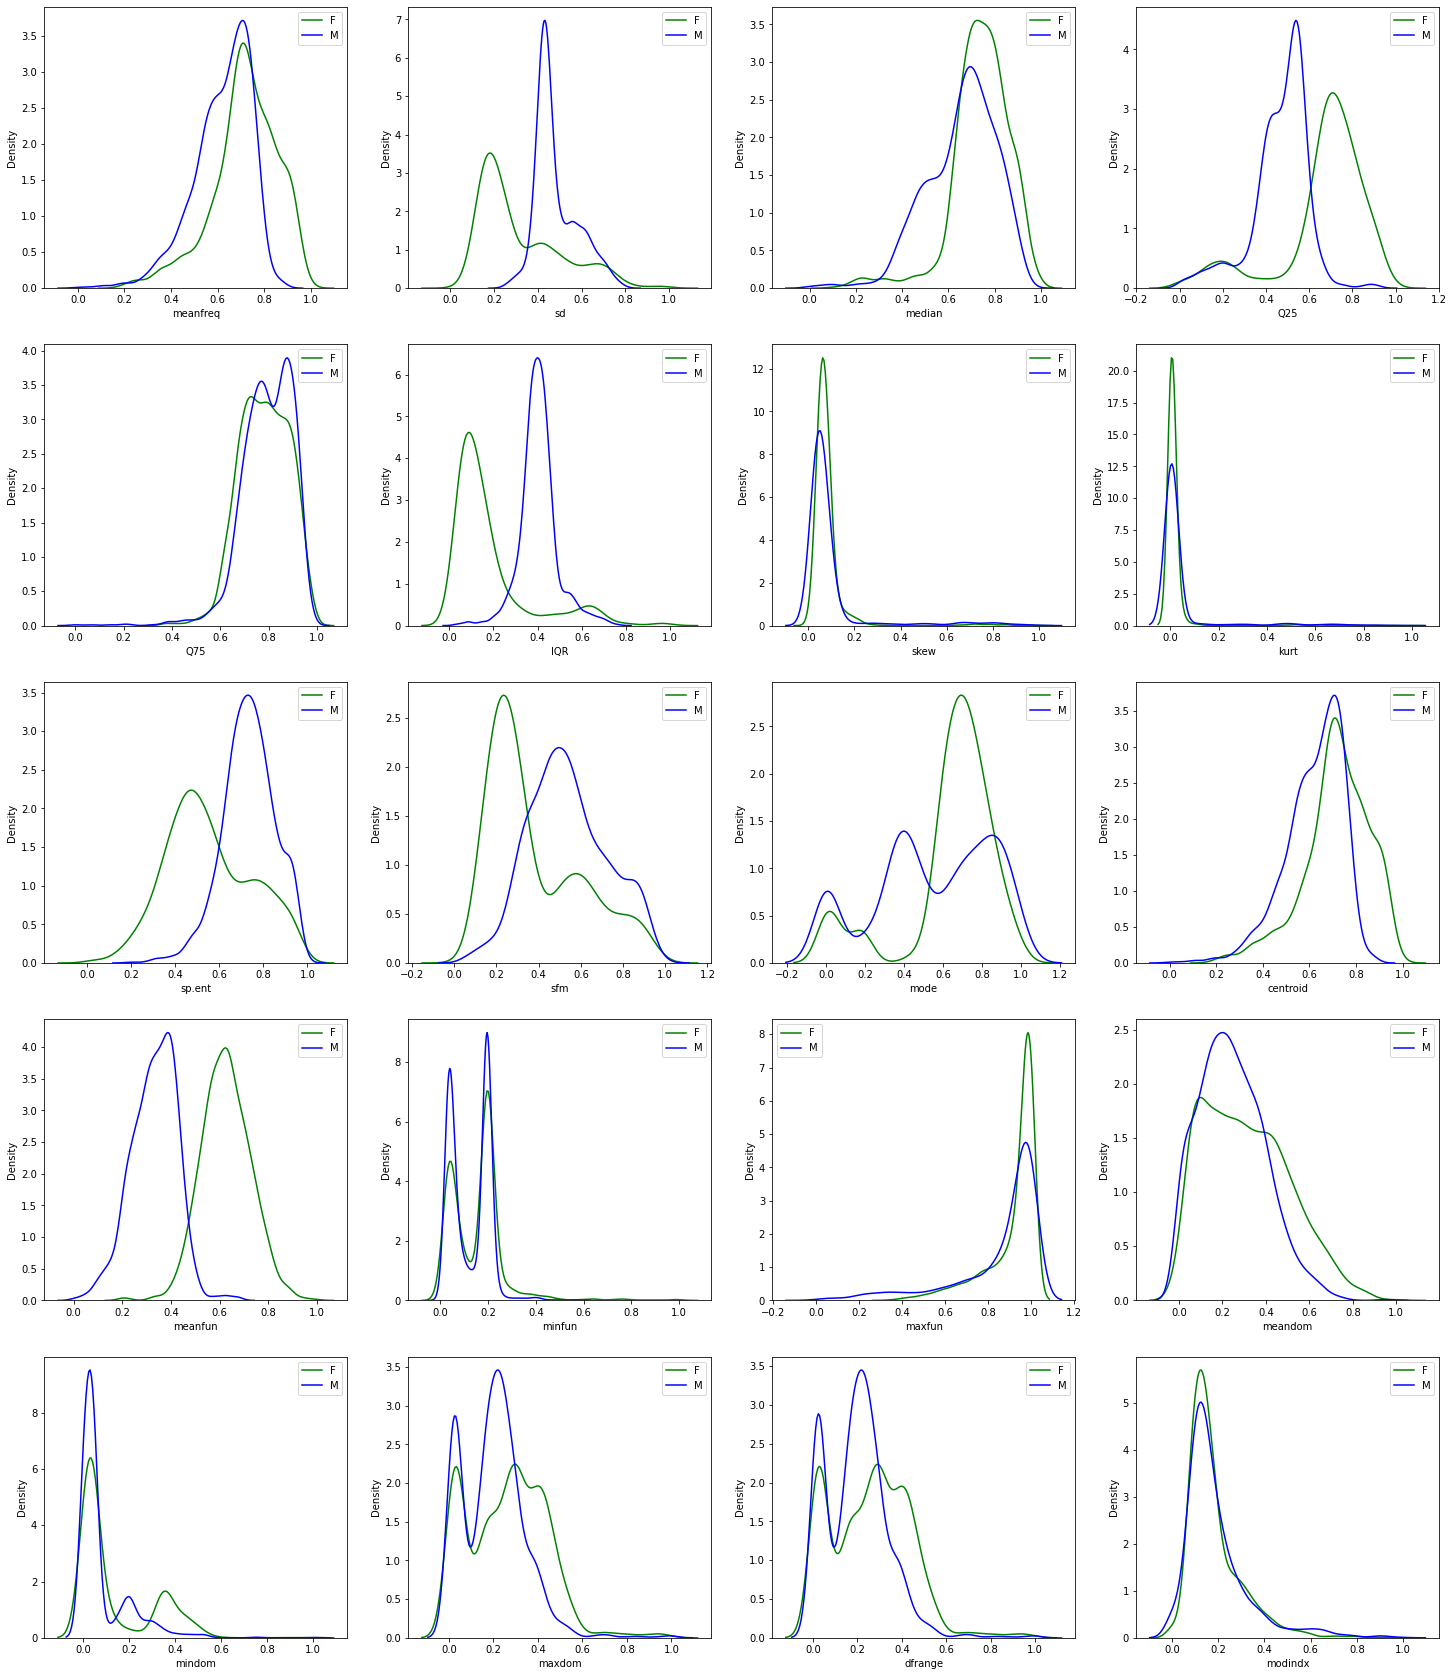

In [16]:
# plt.subplots(5, 4, figsize=(25, 30))
plt.figure(figsize=(25, 30))

for i in range(1, df_voice.shape[1]):
    plt.subplot(5, 4, i)
    # plt.title(df_voice.columns[i-1])
    sns.kdeplot(df_voice.loc[df_voice['label']==0, df_voice.columns[i-1]], color='green', label='F')
    sns.kdeplot(df_voice.loc[df_voice['label']==1, df_voice.columns[i-1]], color='blue', label='M')
    plt.legend()

At first glance, most significant features are sd, Q25, IQR and meanfun. We will build models by using the 20 features and the 4 distinct features.

In [ ]:
plot_imp = df_voice[['sd', 'meanfun', 'IQR', 'Q25', 'label']]

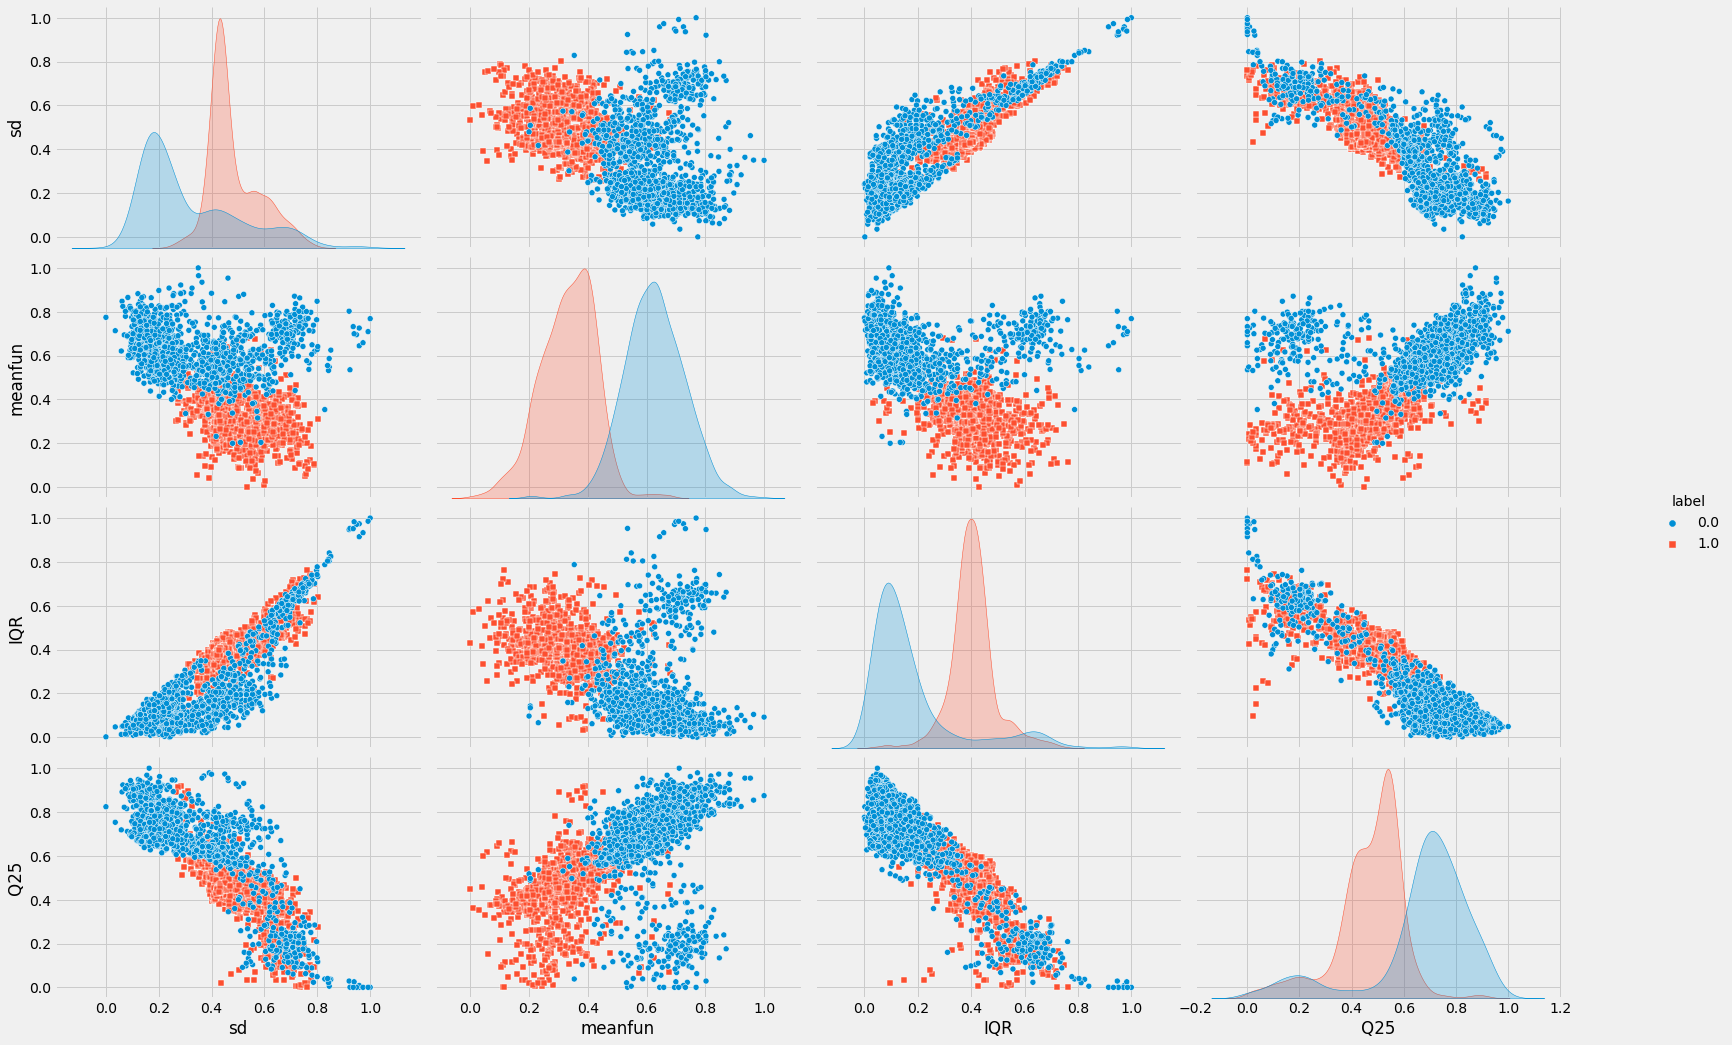

In [ ]:
g = sns.pairplot(plot_imp, hue = 'label', size=3, markers=['o', 's'])
g.fig.set_size_inches(25, 15)

<Figure size 480x320 with 0 Axes>

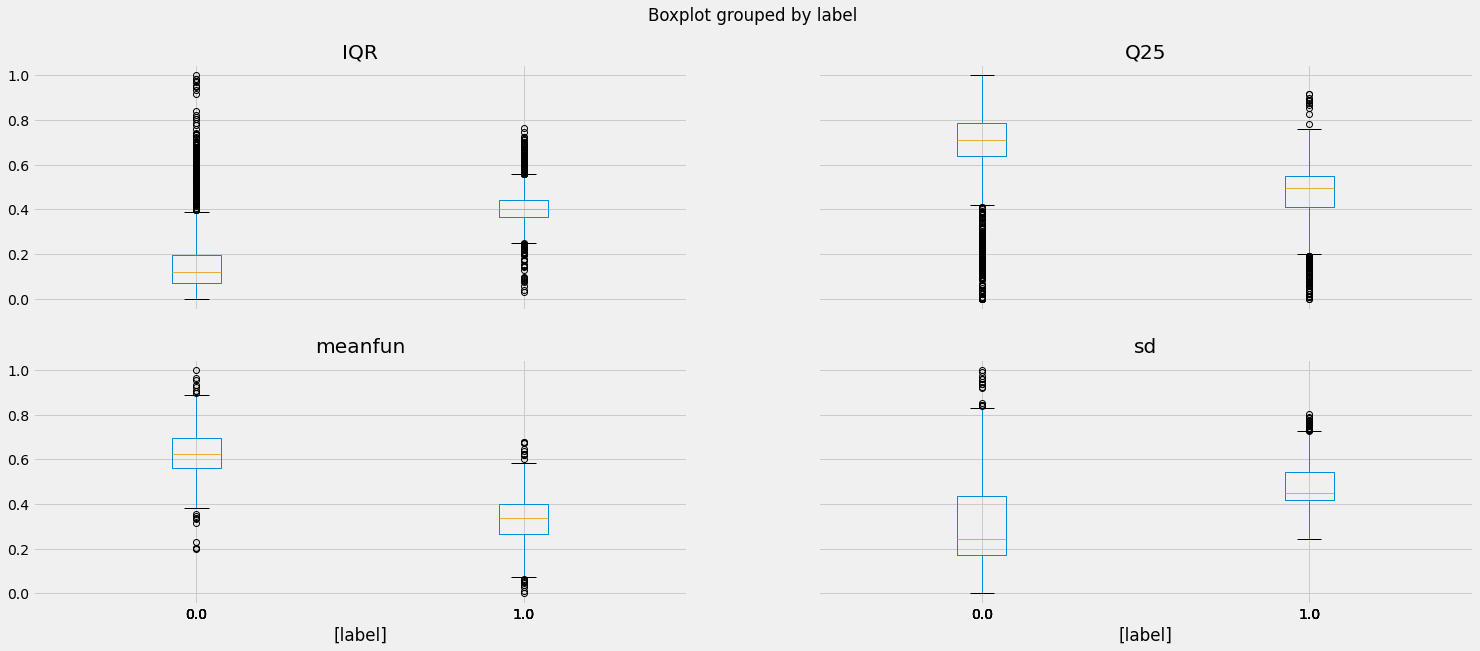

In [ ]:
# Boxplot for categories
plt.figure(dpi=80)
plot_imp.boxplot(by='label', figsize=(25, 10))
plt.show()

#### Removing outliers from the distinct features. 

In [ ]:
# Remove outliers (pair plot after outlier removal)
# plt.hist(dc_iqr)
# plt.show() 

In [ ]:
len_male = len(df_voice['sd'].loc[df_voice['label'] == 1])
len_female = len(df_voice['sd'].loc[df_voice['label'] == 0])

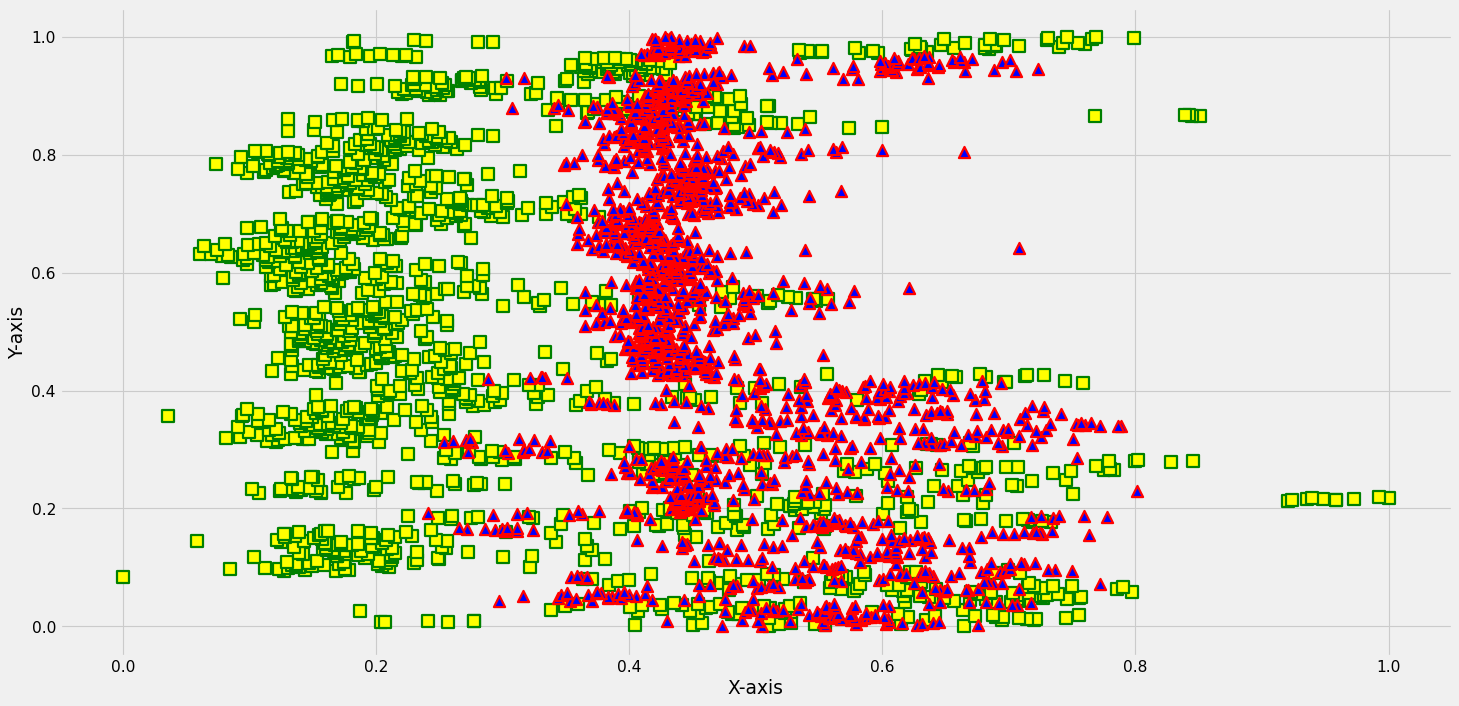

In [ ]:
figure(figsize=(20, 10), dpi=80)

plt.scatter(df_voice['sd'].loc[df_voice['label'] == 0], 
            np.linspace(0, 1, len_female), 
            c='yellow',
            linewidths=2,
            marker='s',
            edgecolor='green',
            s=100)
 
plt.scatter(df_voice['sd'].loc[df_voice['label'] == 1], 
            np.linspace(0, 1, len_male), 
            c='blue',
            linewidths=2,
            marker='^',
            edgecolor='red',
            s=100)    
 
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [ ]:
# After 3d plot remove outliers from plot_imp and check performance on models

#### 3D Visualization

In [ ]:
# plot_imp = df_voice[['sd', 'meanfun', 'IQR', 'Q25', 'label']] Take only 3 features

fig = px.scatter_3d(plot_imp, x='sd', y='meanfun', z='IQR', color='label', height=1000, width=1400)
fig.show()

Using K-Nearest Neighbors, Naive Bayes, Decision Tree, Random Forest, XgBoost, Support Vector Machine and a Neural Network to build models.

In [ ]:
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score
from sklearn import preprocessing, neighbors
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import xgboost, math
from sklearn import svm
from sklearn import naive_bayes
from sklearn import neural_network
from sklearn.tree import DecisionTreeClassifier as dtree_classifier
from sklearn.neighbors import KNeighborsClassifier as knn_classifier
from sklearn.ensemble import RandomForestClassifier as rf_classifier 

In [ ]:
# Split the data
train, test = train_test_split(df_voice, test_size=0.3)

In [ ]:
X_train = train.iloc[:, :-1]
y_train = train['label']
X_test = test.iloc[:, :-1]
y_test = test['label']

In [ ]:
# The four distinct features
X_train_imp = train[['sd', 'meanfun', 'IQR', 'Q25']]
X_test_imp = test[['sd', 'meanfun', 'IQR', 'Q25']]

In [ ]:
X_train_imp

,sd,meanfun,IQR,Q25
937,0.447150,0.318836,0.464620,0.534240
313,0.442645,0.260965,0.368954,0.405903
3060,0.229383,0.746001,0.061196,0.768385
87,0.391307,0.043444,0.334975,0.598631
536,0.554164,0.345147,0.246892,0.465669
...,...,...,...,...
597,0.424867,0.215585,0.370764,0.485168
1007,0.447948,0.410291,0.388491,0.552497
1902,0.431806,0.489296,0.185241,0.635179
390,0.429555,0.272368,0.403551,0.550114


#### Standard report generator for all models.

In [ ]:
def classify(model, x_train, y_train, x_test, y_test):
    # 0 = female, 1 = male (After encoding)
    target_labels = ['female', 'male']
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_labels, digits=4))

### K-Nearest Neighbour

In [ ]:
def knn_error(k, x_train, y_train, x_test, y_test):
    
    error_rate = []
    K = range(1, k)

    for i in K:
        knn = knn_classifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))

    k_loc = error_rate.index(min(error_rate))
    print('Lowest error is %s occurs at k = %s.' %(error_rate[k_loc], K[k_loc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('Value of K')
    plt.ylabel('Error Rate')
    plt.show()
    
    return K[k_loc]

Lowest error is 0.015772870662460567 occurs at k = 12.


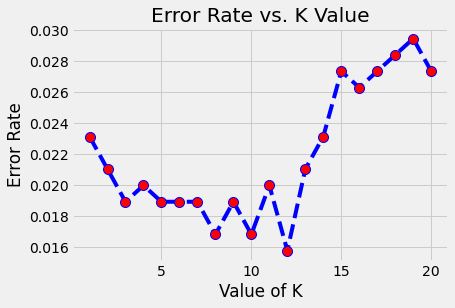

In [ ]:
k = knn_error(21, X_train, y_train, X_test, y_test)

In [ ]:
model = knn_classifier(n_neighbors=k)
classify(model, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

      female     0.9868    0.9804    0.9836       459
        male     0.9818    0.9878    0.9848       492

    accuracy                         0.9842       951
   macro avg     0.9843    0.9841    0.9842       951
weighted avg     0.9842    0.9842    0.9842       951



Lowest error is 0.017875920084121977 occurs at k = 6.


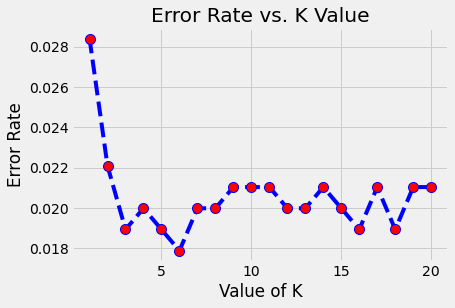

In [ ]:
# Using the four significant features only
k = knn_error(21, X_train_imp, y_train, X_test_imp, y_test)

In [ ]:
model = knn_classifier(n_neighbors=k)
classify(model, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

      female     0.9825    0.9782    0.9803       459
        male     0.9798    0.9837    0.9817       492

    accuracy                         0.9811       951
   macro avg     0.9811    0.9810    0.9810       951
weighted avg     0.9811    0.9811    0.9811       951



### Naive Bayes

In [ ]:
model = naive_bayes.GaussianNB()
classify(model, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

      female     0.9209    0.9129    0.9168       459
        male     0.9194    0.9268    0.9231       492

    accuracy                         0.9201       951
   macro avg     0.9201    0.9198    0.9200       951
weighted avg     0.9201    0.9201    0.9201       951



In [ ]:
# With significant columns
classify(model, X_train_imp, y_train, X_test_imp, y_test)

              precision    recall  f1-score   support

      female     0.9757    0.9608    0.9682       459
        male     0.9639    0.9776    0.9707       492

    accuracy                         0.9695       951
   macro avg     0.9698    0.9692    0.9695       951
weighted avg     0.9696    0.9695    0.9695       951



### Decision Tree

In [ ]:
# Find the best parameter to prune the tree

def dt_error(n, x_train, y_train, x_test, y_test):
    
    nodes = range(2, n)
    error_rate = []

    for n in nodes:
        dtree_model = dtree_classifier(max_leaf_nodes=n)
        dtree_model.fit(x_train, y_train)
        y_pred = dtree_model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    
    n_loc = error_rate.index(min(error_rate))
    print('Lowest error is %s occurs at n = %s.' %(error_rate[n_loc], nodes[n_loc]))

    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    
    return nodes[n_loc]

Lowest error is 0.024185068349106203 occurs at n = 8.


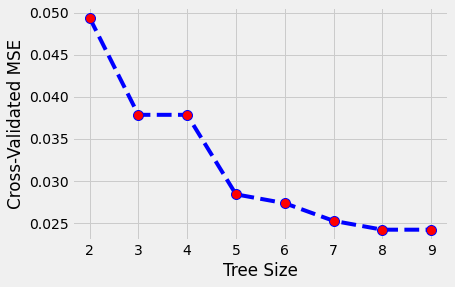

In [ ]:
n = dt_error(10, X_train, y_train, X_test, y_test)

In [ ]:
# Prune tree
pruned_tree = dtree_classifier(criterion='gini', max_leaf_nodes = n)
classify(pruned_tree, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

      female     0.9760    0.9739    0.9749       459
        male     0.9757    0.9776    0.9766       492

    accuracy                         0.9758       951
   macro avg     0.9758    0.9757    0.9758       951
weighted avg     0.9758    0.9758    0.9758       951



Lowest error is 0.025236593059936908 occurs at n = 7.


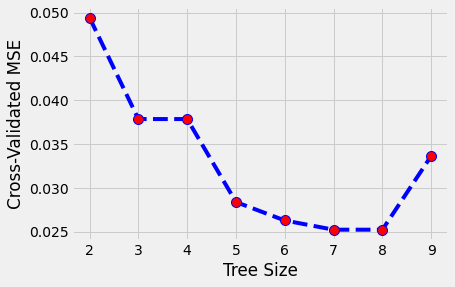

In [ ]:
n = dt_error(10, X_train_imp, y_train, X_test_imp, y_test)

In [ ]:
# With significant columns
pruned_tree = dtree_classifier(criterion='gini', max_leaf_nodes = n)
classify(pruned_tree, X_train_imp, y_train, X_test_imp, y_test)

              precision    recall  f1-score   support

      female     0.9780    0.9695    0.9737       459
        male     0.9718    0.9797    0.9757       492

    accuracy                         0.9748       951
   macro avg     0.9749    0.9746    0.9747       951
weighted avg     0.9748    0.9748    0.9748       951



### Random Forest

In [ ]:
def rf_error(n, x_train, y_train, x_test, y_test):

    error_rate = []
    n_trees = range(1, n, 20)

    for i in n_trees:
        model = rf_classifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))

    n_loc = error_rate.index(min(error_rate))
    print('Lowest error is %s occurs at n = %s.' %(error_rate[n_loc], n_trees[n_loc]))

    plt.plot(n_trees, error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('Value of n')
    plt.ylabel('Error Rate')
    plt.show()

    return n_trees[n_loc]

Lowest error is 0.014721345951629864 occurs at n = 21.


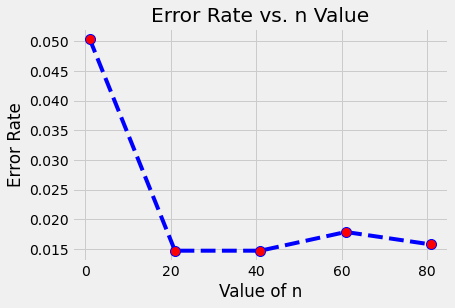

In [ ]:
n_trees = rf_error(100, X_train, y_train, X_test, y_test)

In [ ]:
model = rf_classifier(n_estimators = n_trees)
classify(model, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

      female     0.9784    0.9869    0.9826       459
        male     0.9877    0.9797    0.9837       492

    accuracy                         0.9832       951
   macro avg     0.9831    0.9833    0.9832       951
weighted avg     0.9832    0.9832    0.9832       951



Lowest error is 0.023133543638275498 occurs at n = 41.


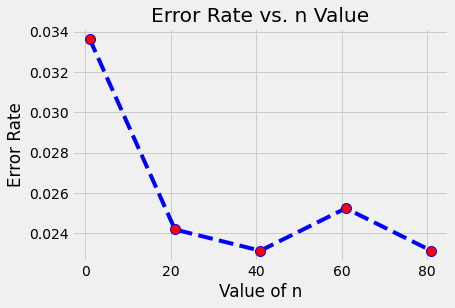

In [ ]:
# With significant columns
n_trees = rf_error(100, X_train_imp, y_train, X_test_imp, y_test)

In [ ]:
model = rf_classifier(n_estimators = n_trees)
classify(model, X_train_imp, y_train, X_test_imp, y_test)

              precision    recall  f1-score   support

      female     0.9698    0.9782    0.9740       459
        male     0.9795    0.9715    0.9755       492

    accuracy                         0.9748       951
   macro avg     0.9746    0.9749    0.9747       951
weighted avg     0.9748    0.9748    0.9748       951



#### Support Vector Machine (SVM)

In [ ]:
def svm_kernel(x_train, y_train, x_test, y_test):

    rate = []
    kernel = ['rbf', 'poly', 'linear']

    for i in kernel:
        model = svm.SVC(kernel=i).fit(x_train, y_train)

        y_pred = model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', round(accuracy_score(y_train, y_pred), 4))
        
        y_pred = model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', round(accuracy_score(y_test, y_pred), 4))

        rate.append(round(accuracy_score(y_test, y_pred), 4))
    
    n_loc = rate.index(max(rate))
    print('\nHighest accuracy is %s occurs at %s kernel.' %(rate[n_loc], kernel[n_loc]))

    return kernel[n_loc]

In [ ]:
def svm_error(k, C, x_train, y_train, x_test, y_test):

    error_rate = []
    C = range(1, C)

    for i in C:
        model = svm.SVC(kernel=k, C=i).fit(x_train, y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))

    c_loc = error_rate.index(min(error_rate))
    print('Lowest error is %s occurs at C = %s.' %(error_rate[c_loc], C[c_loc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()

    return C[c_loc]

In [ ]:
k = svm_kernel(X_train, y_train, X_test, y_test)

rbf  in-sample accuracy in SVM:  0.9783
rbf  out-of-sample accuracy in SVM:  0.9821
poly  in-sample accuracy in SVM:  0.9797
poly  out-of-sample accuracy in SVM:  0.9832
linear  in-sample accuracy in SVM:  0.9747
linear  out-of-sample accuracy in SVM:  0.9769

Highest accuracy is 0.9832 occurs at poly kernel.


Lowest error is 0.015772870662460567 occurs at C = 9.


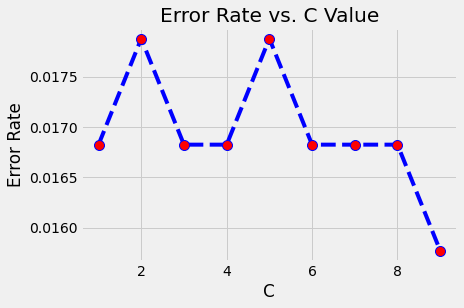

In [ ]:
c = svm_error(k, 10, X_train, y_train, X_test, y_test)

In [ ]:
model = svm.SVC(kernel=k, C=c)
classify(model, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

      female     0.9826    0.9847    0.9837       459
        male     0.9857    0.9837    0.9847       492

    accuracy                         0.9842       951
   macro avg     0.9842    0.9842    0.9842       951
weighted avg     0.9842    0.9842    0.9842       951



In [ ]:
# With significant columns
k = svm_kernel(X_train_imp, y_train, X_test_imp, y_test)

rbf  in-sample accuracy in SVM:  0.9761
rbf  out-of-sample accuracy in SVM:  0.9769
poly  in-sample accuracy in SVM:  0.972
poly  out-of-sample accuracy in SVM:  0.9779
linear  in-sample accuracy in SVM:  0.9689
linear  out-of-sample accuracy in SVM:  0.9727

Highest accuracy is 0.9779 occurs at poly kernel.


Lowest error is 0.01892744479495268 occurs at C = 3.


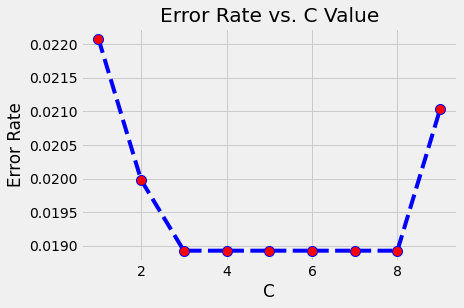

In [ ]:
c = svm_error(k, 10, X_train_imp, y_train, X_test_imp, y_test)

In [ ]:
model = svm.SVC(kernel=k, C=c)
classify(model, X_train_imp, y_train, X_test_imp, y_test)

              precision    recall  f1-score   support

      female     0.9804    0.9804    0.9804       459
        male     0.9817    0.9817    0.9817       492

    accuracy                         0.9811       951
   macro avg     0.9810    0.9810    0.9810       951
weighted avg     0.9811    0.9811    0.9811       951



#### XGBoost

In [ ]:
model = xgboost.XGBClassifier(eval_metric='logloss')
classify(model, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

      female     0.9763    0.9869    0.9816       459
        male     0.9877    0.9776    0.9826       492

    accuracy                         0.9821       951
   macro avg     0.9820    0.9823    0.9821       951
weighted avg     0.9822    0.9821    0.9821       951



In [ ]:
# With significant columns
classify(model, X_train_imp, y_train, X_test_imp, y_test)

              precision    recall  f1-score   support

      female     0.9760    0.9760    0.9760       459
        male     0.9776    0.9776    0.9776       492

    accuracy                         0.9769       951
   macro avg     0.9768    0.9768    0.9768       951
weighted avg     0.9769    0.9769    0.9769       951

